In [2]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=4,
        number_of_hidden_layers=1,
        n_blocks=4
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=1,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
model = model.load("../experiments/convex_banana/convex_potential_flow_5000/weights.pth")

Training:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1, Loss: -9.388, LR: 0.000000: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/cpflow/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


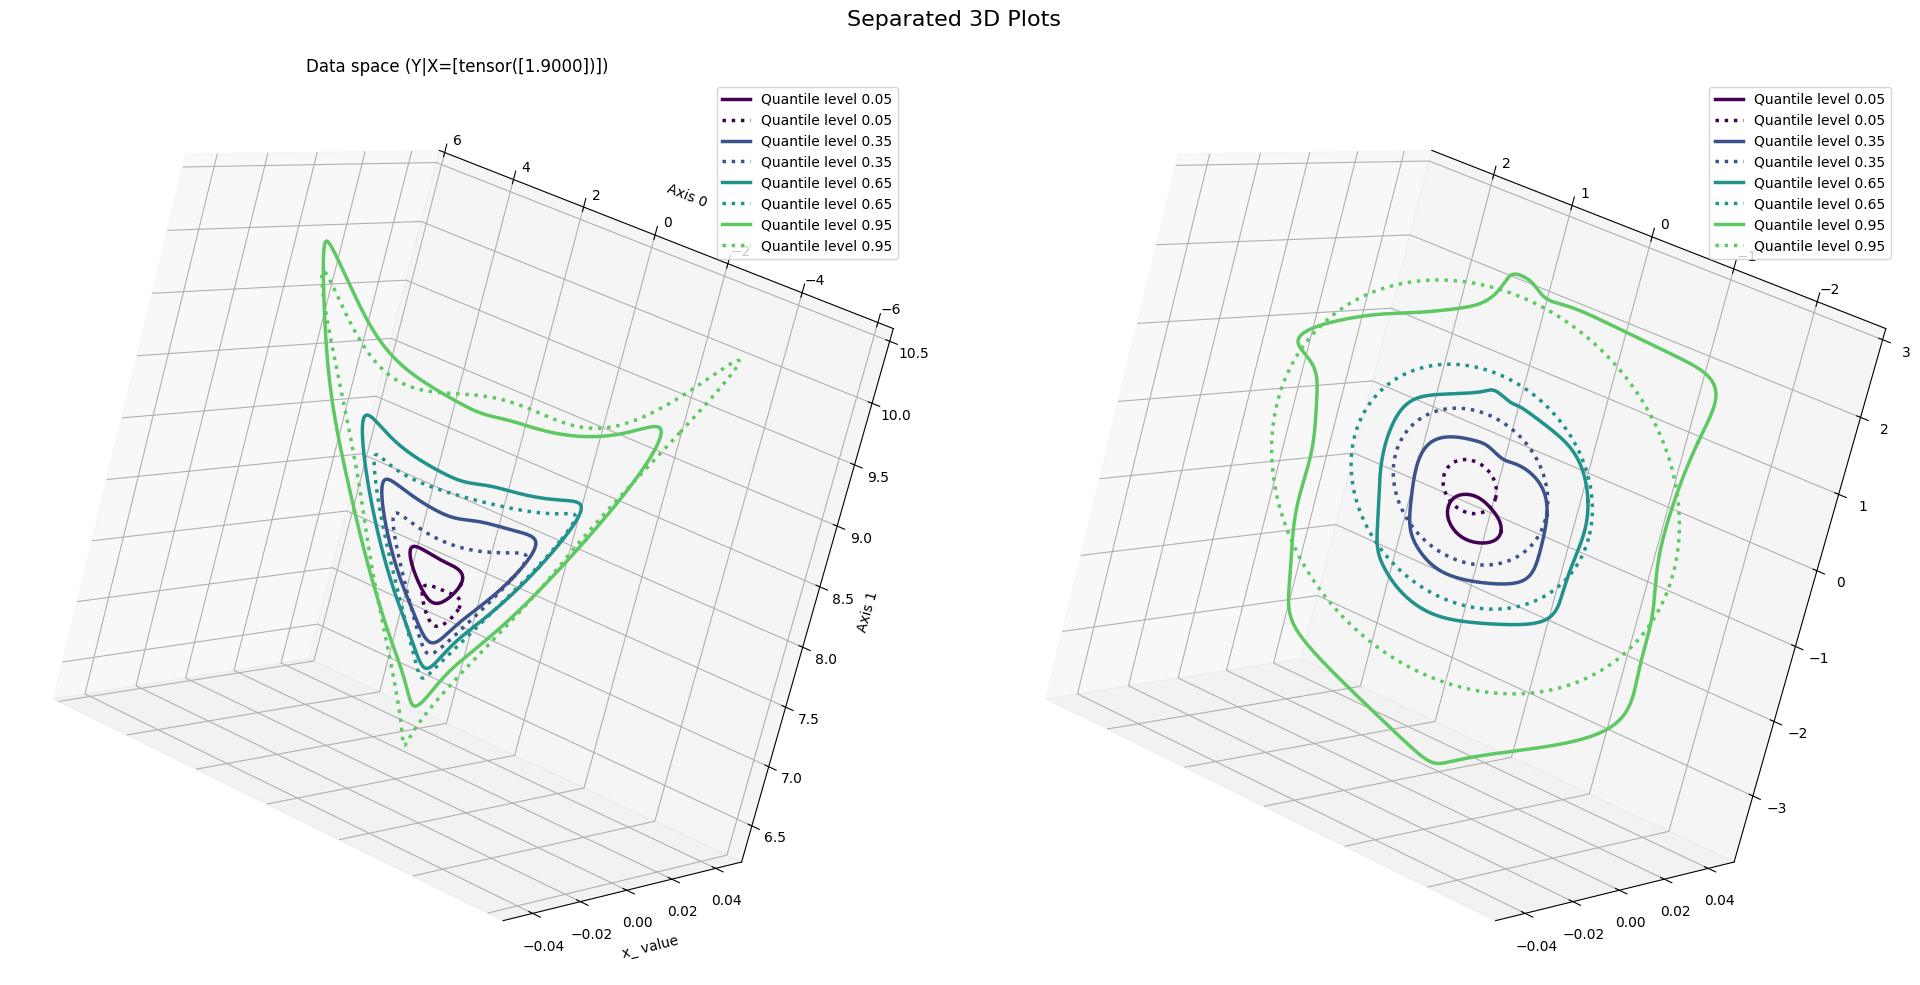

In [3]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import ConvexBananaDataset
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[1.9]]),
    number_of_quantile_levels=4,
    tensor_parameters=experiment.tensor_parameters
)